In [0]:
!pip3 install --upgrade tensorflow==1.4
!pip3 install --upgrade numpy==1.16.2
!pip3 install cairosvg
!pip3 install svgwrite
!pip3 install pytest-shutil

     |████████████████████████████████| 41.2MB 101kB/s 
     |████████████████████████████████| 1.7MB 40.4MB/s 
     |████████████████████████████████| 890kB 46.8MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=48eac3f0cf34f3c3768354bc6334c2bd355b03a32307f475e1f610b9e6a6c099
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.4
    Uninstalling bleach-3.1.4:
      Successfully uninstalled bleach-3.1.4
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


     |████████████████████████████████| 17.3MB 194kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.2
    Uninstalling numpy-1.18.2:
      Successfully uninstalled numpy-1.18.2


     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 71kB 4.0MB/s 
     |████████████████████████████████| 71kB 10.6MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.1.0-cp36-none-any.whl size=88590 sha256=6181ed6f9af3bb9237e7926fa95acffb0f5affade5a1ad45edd8a347daa813eb
  Stored in directory: /root/.cache/pip/wheels/11/5e/47/167d9dfd5fa5850dd0cd3db80afe6db46e620edec3419dce5a
Successfully built cairocffi
     |████████████████████████████████| 71kB 2.3MB/s 


In [0]:
import os
import shutil
import numpy as np
from PIL import Image
from matplotlib import cm
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [0]:
#Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Import important .py files and datasets from drive

data_path = "/content/drive/My Drive/ML_Project/"
shutil.copy(data_path + "Pix2Seq/render_svg2bitmap.py", "/content/")
shutil.copy(data_path + "Pix2Seq/rnn.py", "/content/")
shutil.copy(data_path + "Pix2Seq/sketch_pix2seq_sampling.py", "/content/")
shutil.copy(data_path + "Pix2Seq/sketch_pix2seq_train.py", "/content/")
shutil.copy(data_path + "Pix2Seq/utils.py", "/content/")

newpath = r'/content/datasets' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
    os.makedirs(newpath + '/npz')

dataset1 = 'sheep'
dataset2 = 'flamingo'
shutil.copy(data_path + "Pix2Seq/" + dataset1 + ".npz", "/content/datasets/npz/")
shutil.copy(data_path + "Pix2Seq/" + dataset2 + ".npz", "/content/datasets/npz/")

'/content/datasets/npz/flamingo.npz'

In [0]:
#Get model for Sheep class and generate svg and png images
shutil.copy(data_path + "Pix2Seq/Sheep/model.py", "/content/")
!python /content/render_svg2bitmap.py --data_base_dir='/content/datasets'

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/content/datasets/npz/sheep.npz
Loaded 70000/2500/2500 from sheep.npz
Dataset combined: 1400 (1000/200/200), avg len 84
model_params.max_seq_len 177.
total images <= max_seq_len is 1000
total images <= max_seq_len is 200
total images <= max_seq_len is 200
normalizing_scale_factor 35.1748.
example_idx 0 stroke.shape (43, 3)
pngsize: 250, 250
Not aligned png_curr_w 63 png_curr_h 53
example_idx 1 stroke.shape (43, 3)
pngsize: 250, 250
Not aligned png_curr_w 35 png_curr_h 31
example_idx 2 stroke.shape (43, 3)
pngsize: 250, 250
Not aligned png_curr_w 40 png_curr_h 39
example_idx 3 stroke.shape (44, 3)
pngsize: 250, 250
Not aligned png_curr_w 44 png_curr_h 33
example_idx 4 stroke.shape (44, 3)
pngsize: 250, 250
Not aligned png_curr_w 29 png_curr_h 20
example_idx 5 stroke.shape (44, 3)
pngs

In [0]:
#Uncomment to train model

#!python sketch_pix2seq_train.py

In [0]:
#Import pre-trained model from drive

path_ = "/content/outputs/snapshot"
if os.path.exists(path_):
  shutil.rmtree(path_)
shutil.copytree(data_path + "Pix2Seq/Sheep", "/content/outputs/snapshot")

#Generate samples
!python sketch_pix2seq_sampling.py

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
datasets/npz/sheep.npz
Loaded 70000/2500/2500 from sheep.npz
Dataset combined: 1400 (1000/200/200), avg len 84
model_params.max_seq_len 177.
total images <= max_seq_len is 1000
total images <= max_seq_len is 200
total images <= max_seq_len is 200
normalizing_scale_factor 35.1748.
----------------------------------------------------------------------------------------------------
is_training: True
Model using gpu.
Input dropout mode = False.
Output dropout mode = False.
Recurrent dropout mode = True.
----------------------------------------------------------------------------------------------------
is_training: 0
Model using gpu.
Input dropout mode = 0.
Output dropout mode = 0.
Recurrent dropout mode = 0.
-------------------------------------------------------------------------------

In [0]:
#Rename and save generated output images

os.rename('/content/generated.npy', '/content/sheep_generated.npy')
shutil.copy('/content/sheep_generated.npy', data_path + "Pix2Seq/Outputs/")

'/content/gdrive/My Drive/ML_Project/Pix2Seq/Outputs/sheep_generated.npy'

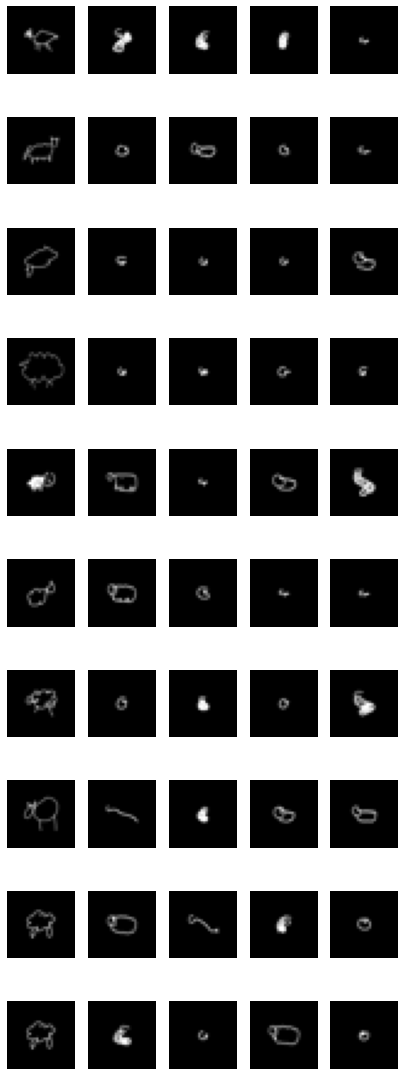

In [0]:
#Display plots of generated images. The first column has images from test data.
#The rest of the columns contain network generated samples 

import matplotlib.pyplot as plt

test_data = np.load('test_images.npy')
grp = np.load('group_generated.npy')

outputs = len(grp[0])

fig, axs = plt.subplots(figsize=(7, 2*len(test_data)))

for d in range(len(test_data)):
  
  inp = 255 - test_data[d].astype(np.uint8)
  
  plt.subplot(len(test_data), outputs + 1, (outputs + 1)*d+1)
  plt.imshow(inp)
  plt.axis('off')

  for i in range(outputs):
    im = 255 - grp[d,i].astype(np.uint8)
    plt.subplot(len(test_data), outputs + 1, (outputs + 1)*d + 2 + i)
    plt.imshow(im)
    plt.axis('off')

  plt.xticks([])
  plt.yticks([])
  plt.axis('off')


In [0]:
#Get model for Flamingo class and generate svg and png images

shutil.rmtree("/content/outputs/snapshot")
os.unlink('/content/model.py')
shutil.copy(data_path + "Pix2Seq/Flamingo/model.py", "/content/")
!python /content/render_svg2bitmap.py --data_base_dir='/content/datasets'

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/content/datasets/npz/flamingo.npz
Loaded 70000/2500/2500 from flamingo.npz
Dataset combined: 1400 (1000/200/200), avg len 50
model_params.max_seq_len 91.
total images <= max_seq_len is 1000
total images <= max_seq_len is 200
total images <= max_seq_len is 200
normalizing_scale_factor 43.9964.
example_idx 0 stroke.shape (28, 3)
pngsize: 250, 250
Not aligned png_curr_w 33 png_curr_h 26
example_idx 1 stroke.shape (28, 3)
pngsize: 250, 250
Not aligned png_curr_w 28 png_curr_h 44
example_idx 2 stroke.shape (28, 3)
pngsize: 250, 250
Not aligned png_curr_w 38 png_curr_h 43
example_idx 3 stroke.shape (28, 3)
pngsize: 250, 250
Not aligned png_curr_w 49 png_curr_h 43
example_idx 4 stroke.shape (28, 3)
pngsize: 250, 250
Not aligned png_curr_w 36 png_curr_h 52
example_idx 5 stroke.shape (28, 3)

In [0]:
#Uncomment to train model

#!python sketch_pix2seq_train.py

In [0]:
#Import pre-trained model from drive

path_ = "/content/outputs/snapshot"
if os.path.exists(path_):
  shutil.rmtree(path_)
shutil.copytree(data_path + "Pix2Seq/Flamingo", "/content/outputs/snapshot")

#Generate Samples
!python sketch_pix2seq_sampling.py

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
datasets/npz/flamingo.npz
Loaded 70000/2500/2500 from flamingo.npz
Dataset combined: 1400 (1000/200/200), avg len 50
model_params.max_seq_len 91.
total images <= max_seq_len is 1000
total images <= max_seq_len is 200
total images <= max_seq_len is 200
normalizing_scale_factor 43.9964.
----------------------------------------------------------------------------------------------------
is_training: True
Model using gpu.
Input dropout mode = False.
Output dropout mode = False.
Recurrent dropout mode = False.
----------------------------------------------------------------------------------------------------
is_training: 0
Model using gpu.
Input dropout mode = 0.
Output dropout mode = 0.
Recurrent dropout mode = 0.
-------------------------------------------------------------------------

In [0]:
#Rename and save generated output images

os.rename('/content/generated.npy', '/content/flamingo_generated.npy')
shutil.copy('/content/flamingo_generated.npy', data_path + "Pix2Seq/Outputs/")

'/content/gdrive/My Drive/ML_Project/Pix2Seq/Outputs/flamingo_generated.npy'

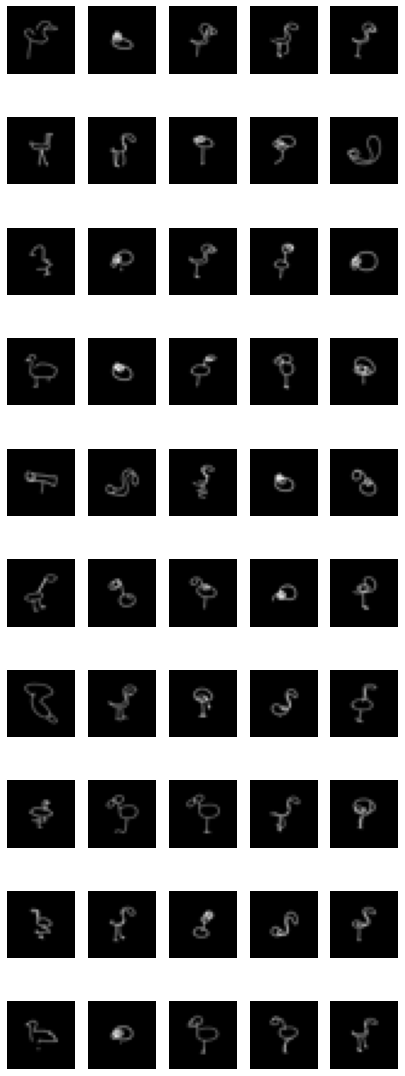

In [0]:
#Display plots of generated images. The first column has images from test data.
#The rest of the columns contain network generated samples

import matplotlib.pyplot as plt

test_data = np.load('test_images.npy')
grp = np.load('group_generated.npy')

outputs = len(grp[0])

fig, axs = plt.subplots(figsize=(7, 2*len(test_data)))

for d in range(len(test_data)):
  
  inp = 255 - test_data[d].astype(np.uint8)
  
  plt.subplot(len(test_data), outputs + 1, (outputs + 1)*d+1)
  plt.imshow(inp)
  plt.axis('off')

  for i in range(outputs):
    im = 255 - grp[d,i].astype(np.uint8)
    plt.subplot(len(test_data), outputs + 1, (outputs + 1)*d + 2 + i)
    plt.imshow(im)
    plt.axis('off')

  plt.xticks([])
  plt.yticks([])
  plt.axis('off')

In [0]:
#Delete intermediate files

os.unlink('/content/test_images.npy')
os.unlink('/content/group_generated.npy')